# Is Jose Altuve a Cheater? A Look at the Numbers

Many of us have gone back and watched countless Astros games to listen for the now infamous trash can bangs. We've seen the footage of Altuve taking extra precautions to hide an alleged buzzer device used to tip him on coming pitches. However, Altuve still maintins innocence. With the eyes and scrutiny of the baseball world on the Astros this season, it's safe to assume that no foul play will be going on this season. Assuming that the Astros are playing good, clean baseball this year, will the numbers reveal anything?

What do I mean be that? Altuve has been on a hot streak as of late. The past few seasons he has been atop the baseball world with plenty of hits and homers to go around. I hypothesize that with the lack of any sort of indication regarding coming pitches, Altuve's batting numbers will have a noticeable dropoff this season. So without further ado, let's dive into some data.

The data has been taken from Baseball Reference (https://www.baseball-reference.com/players/a/altuvjo01.shtml).
I simply copy and pasted the Standard Batting chart into Excel and made a csv, which I have imported below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('altuve.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10 non-null     int64  
 1   Age     10 non-null     int64  
 2   Tm      10 non-null     object 
 3   Lg      10 non-null     object 
 4   G       10 non-null     int64  
 5   PA      10 non-null     int64  
 6   AB      10 non-null     int64  
 7   R       10 non-null     int64  
 8   H       10 non-null     int64  
 9   2B      10 non-null     int64  
 10  3B      10 non-null     int64  
 11  HR      10 non-null     int64  
 12  RBI     10 non-null     int64  
 13  SB      10 non-null     int64  
 14  CS      10 non-null     int64  
 15  BB      10 non-null     int64  
 16  SO      10 non-null     int64  
 17  BA      10 non-null     float64
 18  OBP     10 non-null     float64
 19  SLG     10 non-null     float64
 20  OPS     10 non-null     float64
 21  OPS+    10 non-null     int64  
 22  TB   

In [4]:
data.head(10)

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
0,2011,21,HOU,NL,57,234,221,26,61,10,...,0.654,81,79,5,2,5,1,0,4/H,NaN
1,2012,22,HOU,NL,147,630,576,80,167,34,...,0.740,101,230,8,6,4,4,0,*4/H,AS
2,2013,23,HOU,AL,152,672,626,64,177,31,...,0.678,89,227,24,2,4,8,5,*4/D,NaN
3,2014,24,HOU,AL,158,707,660,85,225,47,...,0.830,135,299,20,5,1,5,7,*4/DH,"AS,MVP-13,SS"
4,2015,25,HOU,AL,154,689,638,86,200,40,...,0.812,125,293,17,9,3,6,8,*4/D,"AS,MVP-10,GG,SS"
5,2016,26,HOU,AL,161,717,640,108,216,42,...,0.928,155,340,15,7,3,7,11,*4D/H6,"AS,MVP-3,SS"
6,2017,27,HOU,AL,153,662,590,112,204,39,...,0.957,160,323,19,9,1,4,3,*4/DH,"AS,MVP-1,SS"
7,2018,28,HOU,AL,137,599,534,84,169,29,...,0.837,130,241,17,6,3,1,4,*4/DH,"AS,MVP-13,SS"
8,2019,29,HOU,AL,124,548,500,89,149,27,...,0.903,131,275,19,3,1,3,0,*4/DH6,NaN
9,2020,30,HOU,AL,35,155,143,23,32,5,...,0.606,63,46,5,1,0,0,0,*4,NaN


Here we have Altuve's past ten seasons. The sign stealing was said to have been a major factor in 2017, and just to be safe, I'll go back a year before that. 2011 through 2015 will be removed.

In [5]:
altuve = data[data['Year']>2015]

In [6]:
altuve

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
5,2016,26,HOU,AL,161,717,640,108,216,42,...,0.928,155,340,15,7,3,7,11,*4D/H6,"AS,MVP-3,SS"
6,2017,27,HOU,AL,153,662,590,112,204,39,...,0.957,160,323,19,9,1,4,3,*4/DH,"AS,MVP-1,SS"
7,2018,28,HOU,AL,137,599,534,84,169,29,...,0.837,130,241,17,6,3,1,4,*4/DH,"AS,MVP-13,SS"
8,2019,29,HOU,AL,124,548,500,89,149,27,...,0.903,131,275,19,3,1,3,0,*4/DH6,NaN
9,2020,30,HOU,AL,35,155,143,23,32,5,...,0.606,63,46,5,1,0,0,0,*4,NaN


There are a lot of columns here that are not relevant, so I am going to go through and delete the ones I don't need.

In [7]:
del altuve['Tm']
del altuve['Lg']
del altuve['Awards']
del altuve['BB']
del altuve['TB']
del altuve['SB']
del altuve['CS']
del altuve['2B']
del altuve['3B']
del altuve['GDP']
del altuve['HBP']
del altuve['SH']
del altuve['SF']
del altuve['IBB']
del altuve['Pos']
del altuve['Age']
del altuve['PA']
del altuve['OPS+']

In [8]:
altuve

,Year,G,AB,R,H,HR,RBI,SO,BA,OBP,SLG,OPS
5,2016,161,640,108,216,24,96,70,0.338,0.396,0.531,0.928
6,2017,153,590,112,204,24,81,84,0.346,0.410,0.547,0.957
7,2018,137,534,84,169,13,61,79,0.316,0.386,0.451,0.837
8,2019,124,500,89,149,31,74,82,0.298,0.353,0.550,0.903
9,2020,35,143,23,32,3,12,29,0.224,0.284,0.322,0.606


So here we have a nice condensed chunk of data that should be enough for us to get a picture of Altuve's batting trends. 

The first thing I'm going to do is to calculate at-bats per game each season. Due to the shortened 2020 season, I want to make sure that the data will reflect his numbers with respect to this.

In [9]:
at_bats_per_ssn = np.array([altuve['AB']/altuve['G']])

In [10]:
at_bats_per_ssn

array([[3.97515528, 3.85620915, 3.89781022, 4.03225806, 4.08571429]])

Already, the data is pretty interesting. Altuve has had more at-bats per game in 2020 than the four years before.

Fortunately for the purpose of this analysis, the main metrics that I will be looking at, the Batting Average (BA) and On Base Percentage (OBP), are calculated based on games played as a whole, and shouldn't be affected too much by the length of the season.

The next metric I'd like to look at is Strike Outs per game. Normally batters have less than one second to analyze a pitch from the pitcher releasing the ball to the ball crossing home. Knowing the pitch ahead of time, even if only by a few seconds, gives the batter plenty of time to prepare stance and swing. This obviously will help the batter get on base. Having to make a decision in less than one second raises the chances of missed swings and early/late swings resulting in foul balls. This significantly raises the chances of being struck out at home. 

Below I am going to compare the average strikeouts per game year over year.

In [11]:
strikes = np.array(altuve['SO']/altuve['G'])

In [12]:
year = np.array(altuve['Year'])

In [13]:
strikes

array([0.43478261, 0.54901961, 0.57664234, 0.66129032, 0.82857143])

In [14]:
year

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

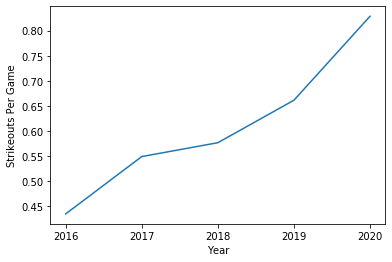

In [15]:
plt.plot(year, strikes, '-')
plt.xlabel('Year')
plt.ylabel('Strikeouts Per Game')
plt.xticks(year)
plt.show()

The 2020 season is clearly a high mark for Altuve in terms of strikeouts per game. However, this data isn't showing a very strong correlation between this season and previous seasons as he has shown an uptrend in strikeouts per game year over year for the past five years. I'll need to find more supporting evidence.



In [16]:
batting = np.array(altuve['BA'])

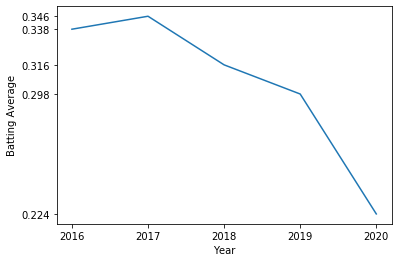

In [17]:
plt.plot(year, batting, '-')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.xticks(year)
plt.yticks(batting)
plt.show()

Here I looked at Altuve's batting average over five years. Despite having a downward trend since 2017, the big year for Astros cheating, I tihnk the drop off from 2019 to 2020 is quite telling. His batting average had a swing of .05 over the span of 3 seasons from 2017 to 2019. However, the .07 drop between 2019 and 2020, not even one season later, is indicative of a major change. 

Next I am going to do the same for On Base Percentage, though I expect that it will more or less follow the batting average trend. 

In [18]:
on_base = np.array(altuve['OBP'])

In [19]:
on_base


array([0.396, 0.41 , 0.386, 0.353, 0.284])

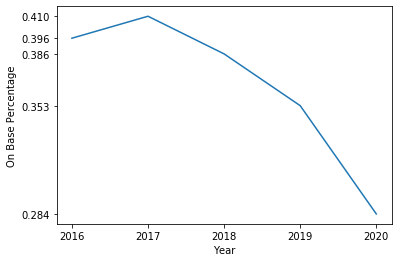

In [20]:
plt.plot(year, on_base, '-')
plt.xlabel('Year')
plt.ylabel('On Base Percentage')
plt.yticks(on_base)
plt.xticks(year)
plt.show()

As expected, the OBP is nearly identical to the BAtting Average. This is due to OBP being the batting average plus walks and hits by pitches, which we can see in our very first table numbered in the single digits each season. 

The last metric I am going to take a look at is the OBS, the On Base Percentage + Slugging. OPS combines the metrics of the OBP with Slugging percentage, which quantifies the power of each on base hit (double, triple, homerun). This metric si key for this analysis because knowing the coming pitch can help the player determine how much power to put into each swing. Harder swings will result in better fielding, allowing batters to get closer to home. It also increases the chances of hitting a homerun.

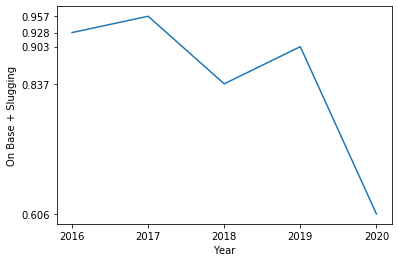

In [21]:
on_base_slg = np.array(altuve['OPS'])

plt.plot(year, on_base_slg, '-')
plt.xlabel('Year')
plt.ylabel('On Base + Slugging')
plt.yticks(on_base_slg)
plt.xticks(year)
plt.show()

Altuve's OPS shows a significant change that I believe can be a direct correlation to  or lack thereof. In the four seasons leading up to the revelation of the Astros cheating, Altuve's lowest OPS was at .837. In the 2020 season, it's .606. That's roughly a 25% drop in production from his weakest season of the past four years. However, he began to trend upwards in 2019, making it over .900. The difference between the 2019 and 2020 seasons is a drop in production of over 30%. 

I want to eliminate the possibility that his drop in production is due to more at-bats in the 2020 season. In 2019 he had 4.03 at bats per game and in 2020, 4.09. This is a difference of about 3 at bats per 100 games. The effect would be negligibile.  

(5    2016
 6    2017
 7    2018
 8    2019
 9    2020
 Name: Year, dtype: int64,
 5    0.928
 6    0.957
 7    0.837
 8    0.903
 9    0.606
 Name: OPS, dtype: float64)

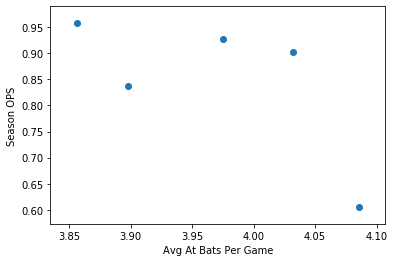

In [36]:
plt.scatter(at_bats_per_ssn, on_base_slg)
plt.xlabel('Avg At Bats Per Game')
plt.ylabel('Season OPS')
altuve['Year'],altuve['OPS']

With this data, it becomes clear that Altuve's drop in production cannot be attributed to a couple extra at bats per 100 games. The difference is just too great for that to really be a factor.

# Conclusion

This analysis set out to see if Jose Altuve's production at bat would be noticeable between seasons in which he cheated and seasons in which he didn't cheat. The numbers and charts speak for themselves; in the popular at-bat production metrics, Altuve has seen a drop in production in the season following getting caught. 

My next analysis will be to see if I can determine which year the Astros and Altuve started cheating. To do this, I will likely examine Altuve's early years up through the seasons we know he cheated. I'll compare these to rookies from the same year, players with similar numbers to Altuve, and some other members of the Astros to see if I can find a sudden uptick in production that isn't noticeable in other players.

This was my first independent anaylsis using sabermetrics, so it may be rough around the edges. I made this analysis as a learning experience. If you've made it this far, I appreciate your audience and would welcome any feedback you may have.